In [1]:
import glob
import re
import numpy as np
import pandas as pd
import clima_anom as ca
from netCDF4 import Dataset

import matplotlib.pyplot as plt

import matplotlib.cbook
import matplotlib.gridspec as gridspec

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
season = 'summer'

In [3]:
data_in = '/mnt/Data/Data/IMERG/season/'+season+'/IMERG_2001_01_2021_12_24h_05x05_'+season+'.nc'
data = ca.read_netcdf(data_in,2)
lat = data['lat']
lon = data['lon']
tim = data['time']
pre = data['prec']

pre_mean = np.mean(pre,axis=0)

ntime, nlat, nlon = np.shape(pre)
lon2d, lat2d = np.meshgrid(lon, lat)

time : (1895,)
lon : (110,)
lat : (110,)
prec : (1895, 110, 110)


In [4]:
def montlhy_pentad(data_in):
    ntime, nlat, nlon = np.shape(data_in)

    if ntime == 30 or ntime == 31:
        pentad = np.zeros([6,nlat,nlon])
        for i in range(nlat):
            for j in range(nlon):
                for t in range(6):
                    days = data_in[5*t:5*t+5,i,j]
                    pentad[t,i,j] = np.mean(days)

    elif ntime == 28 or ntime == 29:
        pentad = np.zeros([5,nlat,nlon])
        for i in range(nlat):
            for j in range(nlon):
                for t in range(5):
                    days = data_in[5*t:5*t+5,i,j]
                    pentad[t,i,j] = np.mean(days)

    return pentad

In [5]:
print(f'Season: {season}')

if season == 'all':
    month_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
elif season == 'summer':
    month_list = [1, 2, 12]
elif season == 'autumn':
    month_list = [3, 4, 5]
elif season == 'winter':
    month_list = [6, 7, 8]
elif season == 'spring':
    month_list = [9, 10, 11]

Season: summer


In [6]:
allArrays = None

for year in range(2001,2022):
    print(f'Year: {year}')

    for m in month_list:
        indices = []

        for t in range(ntime):
            if tim[t].year == year and m == tim[t].month:
                indices.append(t)

        # print(f'  Mes: {m} - {len(indices)}')

        tmp = pre[indices,:,:]
        tmp_pentad = montlhy_pentad(tmp)

        if allArrays is None:
            allArrays = tmp_pentad
        else:
            allArrays = np.concatenate(([allArrays , tmp_pentad ]), axis=0)

pentad_mean = np.mean(allArrays,axis=0)

Year: 2001
Year: 2002
Year: 2003
Year: 2004
Year: 2005
Year: 2006
Year: 2007
Year: 2008
Year: 2009
Year: 2010
Year: 2011
Year: 2012
Year: 2013
Year: 2014
Year: 2015
Year: 2016
Year: 2017
Year: 2018
Year: 2019
Year: 2020
Year: 2021


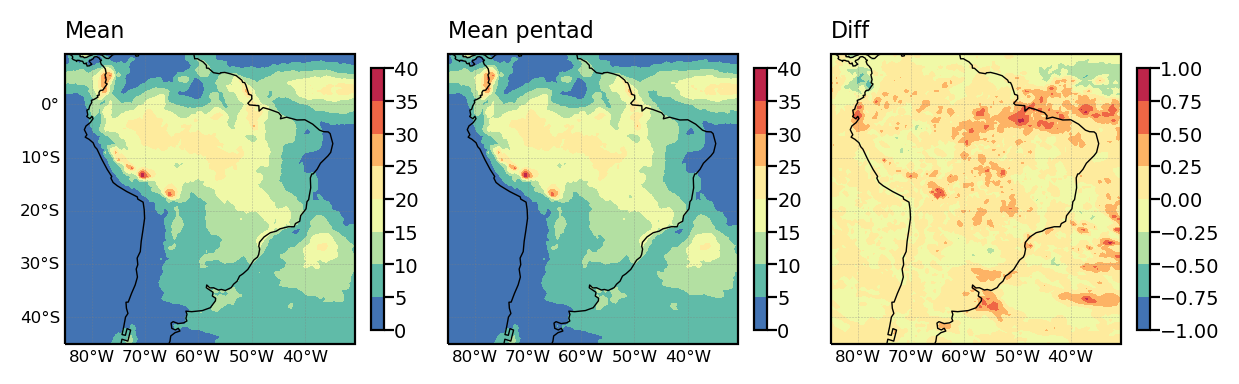

In [7]:
linewidth_shape = 0.2
pentad_mean
level_mean = None

proj = ccrs.PlateCarree()
cmap = plt.cm.Spectral_r

fig = plt.figure(figsize=(7,5),dpi=200)
gs = gridspec.GridSpec(1,3)

ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
a1 = ax1.contourf(lon2d,lat2d,pre_mean,cmap=cmap)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = True
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
ax1.set_title('Mean',fontsize=8,loc='left')
cbar1 = plt.colorbar(a1,fraction=0.041)
cbar1.ax.tick_params(labelsize=7, pad=0.04)

ax1 = plt.subplot(gs[0, 1], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
a1 = ax1.contourf(lon2d,lat2d,pentad_mean,cmap=cmap)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
ax1.set_title('Mean pentad',fontsize=8,loc='left')
cbar1 = plt.colorbar(a1,fraction=0.041)
cbar1.ax.tick_params(labelsize=7, pad=0.04)

ax1 = plt.subplot(gs[0, 2], projection = proj)
ax1.coastlines(linestyle='-',linewidth=0.5,color='black',zorder=4)
a1 = ax1.contourf(lon2d,lat2d,pre_mean - pentad_mean,cmap=cmap)
gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.left_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 6, 'color': 'k'}
gl.ylabel_style = {'size': 6, 'color': 'k'}
ax1.set_title('Diff',fontsize=8,loc='left')
cbar1 = plt.colorbar(a1,fraction=0.041)
cbar1.ax.tick_params(labelsize=7, pad=0.04)


In [8]:
print(f'Season: {season}')

if season == 'all':
    y_s = 1999; m_s = 1; d_s = 1
    y_e = 2013; m_e = 7; d_e = 30

elif season == 'summer':
    y_s = 1999; m_s = 1; d_s = 1
    y_e = 2002; m_e = 6; d_e = 25

elif season == 'winter':
    y_s = 1999; m_s = 1; d_s = 1
    y_e = 2002; m_e = 9; d_e = 10

Season: summer


In [9]:
if season == 'all':
    file_out = '/mnt/Data/Data/IMERG/pentad/IMERG_2001_01_2021_12_24h_05x05_pentad.nc'

else:
    file_out = '/mnt/Data/Data/IMERG/pentad/IMERG_2001_01_2021_12_24h_05x05_'+season+'_pentad.nc'

print(f'File import : {file_out}')
print(f'Export shape: {np.shape(allArrays)}')

File import : /mnt/Data/Data/IMERG/pentad/IMERG_2001_01_2021_12_24h_05x05_summer_pentad.nc
Export shape: (357, 110, 110)


In [10]:
# Export Pentad catrin data
info = {'file': file_out, 
        'title': 'South America IMERG daily pentad',
        'year_start':y_s,'month_start':m_s,'day_start':d_s,'hour_start':0,'minute_start':0,
        'year_end':y_e,'month_end':m_e,'day_end':d_e,'hour_end':23,'minute_end':59,
        'time_frequency': 'daily',
        'time_interval':5,
        'var_name': 'pre',
        'var_units': 'mm/day'}

ca.create_netcdf(info,allArrays,lat,lon)

Time Start: 1999-01-01 00:00:00
Time End: 2002-06-24 00:00:00
Time Frequency: daily
Time Lenght: 255

File created in:  /mnt/Data/Data/IMERG/pentad/IMERG_2001_01_2021_12_24h_05x05_summer_pentad.nc
File title:  South America IMERG daily pentad
var title:  pre
var units:  mm/day
